In [1]:
#import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sp

%matplotlib inline

In [2]:
df = pd.read_excel(r'Documents\PACensusData.xls')
df

,CountyName,PovertyEstimate,PovertyPercent,MedianHouseholdIncome
0,Adams County,2823,14.0,59645
1,Allegheny County,34743,15.2,56099
2,Armstrong County,2443,19.5,46968
3,Beaver County,5035,15.5,54715
4,Bedford County,1642,17.3,44834
...,...,...,...,...
62,Washington County,4639,11.5,58068
63,Wayne County,1592,18.7,49357
64,Westmoreland County,9150,14.1,56544
65,Wyoming County,908,17.1,55836


In [3]:
#Descriptive statistics
df.describe(include='all')

,CountyName,PovertyEstimate,PovertyPercent,MedianHouseholdIncome
count,67,67.000000,67.000000,67.000000
unique,67,NaN,NaN,NaN
top,Mercer County,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,7198.432836,19.197015,52552.522388
std,NaN,15962.701329,7.026270,10278.971079
min,NaN,124.000000,7.500000,38819.000000
25%,NaN,1601.500000,15.300000,45111.000000
50%,NaN,3215.000000,18.800000,49274.000000
75%,NaN,6540.000000,21.900000,59137.500000


In [4]:
df.set_index('CountyName')

,PovertyEstimate,PovertyPercent,MedianHouseholdIncome
CountyName,,,
Adams County,2823,14.0,59645
Allegheny County,34743,15.2,56099
Armstrong County,2443,19.5,46968
Beaver County,5035,15.5,54715
Bedford County,1642,17.3,44834
...,...,...,...
Washington County,4639,11.5,58068
Wayne County,1592,18.7,49357
Westmoreland County,9150,14.1,56544


In [5]:
df.loc[df['PovertyPercent'].idxmax()]

CountyName               Forest County
PovertyEstimate                    124
PovertyPercent                    57.1
MedianHouseholdIncome            38819
Name: 26, dtype: object

In [6]:
df.loc[df['PovertyPercent'].idxmin()]


CountyName               Chester County
PovertyEstimate                    8822
PovertyPercent                      7.5
MedianHouseholdIncome             92551
Name: 14, dtype: object

In [22]:
#fuction to print highest poverty rate
def print_highest_data():
    i = df.loc[df['PovertyPercent'].idxmax()]
    print (i)

print_highest_data()

CountyName               Forest County
PovertyEstimate                    124
PovertyPercent                    57.1
MedianHouseholdIncome            38819
Name: 26, dtype: object


In [23]:
#fuction to print lowest poverty rate
def print_lowest_data():
    n = df.loc[df['PovertyPercent'].idxmin()]
    print (n)

print_lowest_data()

CountyName               Chester County
PovertyEstimate                    8822
PovertyPercent                      7.5
MedianHouseholdIncome             92551
Name: 14, dtype: object


In [26]:
#function to print highest and lowest poverty data
def print_min_max_data():
    print("The following data will provide the county with the lowest percentage of children in poverty: \n")
    print(print_lowest_data())
    print("\nThe following data will provide county with the the highest percentage of children in poverty: \n")
    print(print_highest_data())
    
    
print_min_max_data()
    

The following data will provide the county with the lowest percentage of children in poverty: 

CountyName               Chester County
PovertyEstimate                    8822
PovertyPercent                      7.5
MedianHouseholdIncome             92551
Name: 14, dtype: object
None

The following data will provide county with the the highest percentage of children in poverty: 

CountyName               Forest County
PovertyEstimate                    124
PovertyPercent                    57.1
MedianHouseholdIncome            38819
Name: 26, dtype: object
None


In [10]:
df.loc[df['CountyName'] == "Wayne County"]

,CountyName,PovertyEstimate,PovertyPercent,MedianHouseholdIncome
63,Wayne County,1592,18.7,49357


In [11]:
#return county names
df['CountyName']

0            Adams County
1        Allegheny County
2        Armstrong County
3           Beaver County
4          Bedford County
             ...         
62      Washington County
63           Wayne County
64    Westmoreland County
65         Wyoming County
66            York County
Name: CountyName, Length: 67, dtype: object

In [12]:
#input lookup with case sensitivity. Will need to enter the full county name for result

county = input("What county would you like to look up? ")   

while county != "quit":
    
    if county in list(df['CountyName']):
        print(df.loc[df['CountyName'] == county])
    county = input("What county would you like to look up? Or if you would like to quit enter q or quit.")
    
print("thanks for playing")    

What county would you like to look up? 
What county would you like to look up? Or if you would like to quit enter q or quit.quit\
What county would you like to look up? Or if you would like to quit enter q or quit.quit
thanks for playing


In [45]:
#lookup without case sensitivity. does not provide results

import re

county_input = input("What county would you like to look up? ")

current_county_list = list(df['CountyName'])
partial_lookup = [x for x in current_county_list if re.search(county_input, x, re.IGNORECASE)]
for result in partial_lookup:
    print (result)

What county would you like to look up? erie
Erie County


In [14]:
#loop and results without case sensitivity

import re


county = input("What county would you like to look up? ")   

while county != "quit":
    
    current_county_list = list(df['CountyName'])
    partial_lookup = [x for x in current_county_list if re.search(county, x, re.IGNORECASE)]
    
    for result in partial_lookup:
        print (result)
        if result in list(df['CountyName']):
            print(df.loc[df['CountyName'] == result])
    county = input("What county would you like to look up? Or if you would like to quit enter q or quit.")
    
print("thanks for playing")    

What county would you like to look up? e
Allegheny County
         CountyName  PovertyEstimate  PovertyPercent  MedianHouseholdIncome
1  Allegheny County            34743            15.2                  56099
Beaver County
      CountyName  PovertyEstimate  PovertyPercent  MedianHouseholdIncome
3  Beaver County             5035            15.5                  54715
Bedford County
       CountyName  PovertyEstimate  PovertyPercent  MedianHouseholdIncome
4  Bedford County             1642            17.3                  44834
Berks County
     CountyName  PovertyEstimate  PovertyPercent  MedianHouseholdIncome
5  Berks County            18364            19.9                  59205
Butler County
      CountyName  PovertyEstimate  PovertyPercent  MedianHouseholdIncome
9  Butler County             3308             8.9                  66277
Cameron County
        CountyName  PovertyEstimate  PovertyPercent  MedianHouseholdIncome
11  Cameron County              192            24.3         

In [29]:
#function to pint county data

def print_county_data():

    import re


    county = input("What county would you like to look up? ")   

    while county != "quit":

        current_county_list = list(df['CountyName'])
        partial_lookup = [x for x in current_county_list if re.search(county, x, re.IGNORECASE)]

        for county in partial_lookup:
            print (df.loc[df['CountyName'] == county])
            
        county = input("What county would you like to look up? Or if you would like to end this search enter quit.")

    print("Thanks for searching!")  
    
print_county_data()

What county would you like to look up? erie
     CountyName  PovertyEstimate  PovertyPercent  MedianHouseholdIncome
24  Erie County            14063            24.0                  48820
What county would you like to look up? Or if you would like to end this search enter quit.chester
        CountyName  PovertyEstimate  PovertyPercent  MedianHouseholdIncome
14  Chester County             8822             7.5                  92551
What county would you like to look up? Or if you would like to end this search enter quit.quit
Thanks for searching!


In [27]:
#this fuction will print the data from all functions

def print_data():
    print_min_max_data()
    print_county_data()
    
print_data()

The following data will provide the county with the lowest percentage of children in poverty: 

CountyName               Chester County
PovertyEstimate                    8822
PovertyPercent                      7.5
MedianHouseholdIncome             92551
Name: 14, dtype: object
None

The following data will provide county with the the highest percentage of children in poverty: 

CountyName               Forest County
PovertyEstimate                    124
PovertyPercent                    57.1
MedianHouseholdIncome            38819
Name: 26, dtype: object
None
What county would you like to look up? erie
     CountyName  PovertyEstimate  PovertyPercent  MedianHouseholdIncome
24  Erie County            14063            24.0                  48820
What county would you like to look up? Or if you would like to end this search enter quit.quit
Thanks for searching!


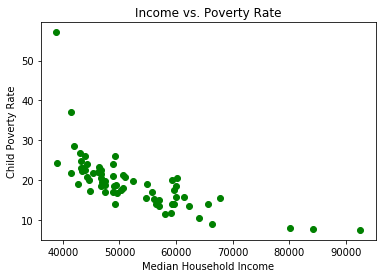

In [44]:
plt.scatter(df['MedianHouseholdIncome'], df['PovertyPercent'], c='G')
plt.title('Income vs. Poverty Rate')
plt.xlabel('Median Household Income')
plt.ylabel('Child Poverty Rate')

plt.show()